In [113]:
from google.colab import files
upload = files.upload()

Saving housing.csv to housing.csv


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

ModuleNotFoundError: No module named 'tensorflow'

In [7]:
file_name = 'sonar.csv'
data = pd.read_csv('sonar.csv', header = None)

In [8]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [20]:
data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

In [23]:
def getOneHotEncodedLabel(y):
    # 문자열을 숫자로 변환
    e = LabelEncoder()
    e.fit(y)  
    Y = e.transform(y) # 문자열을 각각 숫자로 변환 
    Y_encoded = tf.keras.utils.to_categorical(Y) # 숫자로 변환 각각의 데이터를 각각 one hot vecotr 화 시킨다. 
    return Y_encoded


In [ ]:
y = data[60]
e = LabelEncoder()
print(e.fit(y))
Y = e.transform(y)
print(Y)
Y_encoded = tf.keras.utils.to_categorical(Y)
print(Y_encoded)

In [57]:
X = data.iloc[:, : (len(data.columns) - 1)]
Y = data.iloc[:, -1]

In [33]:
print(X.head())
print(Y.head())

       0       1       2       3   ...      56      57      58      59
0  0.0200  0.0371  0.0428  0.0207  ...  0.0180  0.0084  0.0090  0.0032
1  0.0453  0.0523  0.0843  0.0689  ...  0.0140  0.0049  0.0052  0.0044
2  0.0262  0.0582  0.1099  0.1083  ...  0.0316  0.0164  0.0095  0.0078
3  0.0100  0.0171  0.0623  0.0205  ...  0.0050  0.0044  0.0040  0.0117
4  0.0762  0.0666  0.0481  0.0394  ...  0.0072  0.0048  0.0107  0.0094

[5 rows x 60 columns]
0    R
1    R
2    R
3    R
4    R
Name: 60, dtype: object


In [59]:
Y = getOneHotEncodedLabel(Y)

In [66]:
print(Y[:5])
print(Y.shape)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]
(208, 2)


In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, Y)

In [73]:
X_train.shape

(156, 60)

In [74]:
model = tf.keras.Sequential()
model.add ( Dense( 50, activation = 'relu') )
model.add ( Dense( 100, activation = 'relu') )
model.add ( Dense( 2, activation = 'softmax') )

In [75]:
model.compile( optimizer = 'adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [76]:
model.fit(X_train, y_train, epochs = 10, batch_size = 1)

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

156/156 [==============================] - 0s 1ms/step - loss: 0.6964 - accuracy: 0.5192
Epoch 2/10
156/156 [==============================] - 0s 1ms/step - loss: 0.6221 - accuracy: 0.6538
Epoch 3/10
156/156 [==============================] - 0s 1ms/step - loss: 0.5486 - accuracy: 0.7500
Epoch 4/10
156/156 [==============================] - 0s 1ms/step - loss: 0.4782 - accuracy: 0.7756
Epoch 5/10
156/156 [==============================] - 0s 1ms/step - loss: 0.4461 - accuracy: 0.8077
Epoch 6/

In [77]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (1, 50)                   3050      
_________________________________________________________________
dense_16 (Dense)             (1, 100)                  5100      
_________________________________________________________________
dense_17 (Dense)             (1, 2)                    202       
Total params: 8,352
Trainable params: 8,352
Non-trainable params: 0
_________________________________________________________________


In [79]:
eval = model.evaluate(X_test, y_test)
model_name = model.__class__.__name__
print('{0} 정확도: {1:.4f}, Loss: {2:.4f}'.format(model_name, eval[1], eval[0]))

2/2 [==============================] - 0s 2ms/step - loss: 0.3797 - accuracy: 0.7692
Sequential 정확도: 0.7692, Loss: 0.3797


In [132]:
import numpy as np 

def Scailing_set(data) :
  deco = data - np.min(data)
  enco = np.max(data) - np.min(data)
  return deco / (enco + 0.00000001)

In [86]:
dt_pima = pd.read_csv('pima-indians-diabetes.csv', header = None)

In [87]:
dt_pima.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [104]:
pima_x = dt_pima.iloc[:, 0:(len(dt_pima.columns) - 1)]
pima_y = dt_pima.iloc[:, - 1]

In [105]:
pima_model = tf.keras.Sequential()
pima_model.add ( Dense( 50, activation = 'relu') )
pima_model.add ( Dense( 100, activation = 'relu') )
pima_model.add ( Dense( 1, activation = 'sigmoid') )

In [106]:
pima_model.compile( optimizer = 'adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [107]:
pima_model.fit(pima_x, pima_y, epochs= 5, batch_size = 10)

Epoch 1/5

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

77/77 [==============================] - 0s 1ms/step - loss: 1.1902 - accuracy: 0.6185
Epoch 2/5
77/77 [==============================] - 0s 1ms/step - loss: 0.7775 - accuracy: 0.6172
Epoch 3/5
77/77 [==============================] - 0s 1ms/step - loss: 0.8042 - accuracy: 0.6615
Epoch 4/5
77/77 [==============================] - 0s 1ms/step - loss: 0.7408 - accuracy: 0.6654
Epoch 5/5
77/77 [==============================] - 0s 1ms/step - loss: 0.7464 - accuracy: 0.6406


In [110]:
dt_surgery = pd.read_csv('ThoraricSurgery.csv', header=None)

In [111]:
dt_surgery.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,293,1,3.80,2.80,0,0,0,0,0,0,12,0,0,0,1,0,62,0
1,1,2,2.88,2.16,1,0,0,0,1,1,14,0,0,0,1,0,60,0
2,8,2,3.19,2.50,1,0,0,0,1,0,11,0,0,1,1,0,66,1
3,14,2,3.98,3.06,2,0,0,0,1,1,14,0,0,0,1,0,80,1
4,17,2,2.21,1.88,0,0,1,0,0,0,12,0,0,0,1,0,56,0


In [112]:
dt_surgery[17].unique()

array([0, 1])

In [ ]:
surgery_x = dt_surgery.iloc[:, 0:(len(dt_surgery.columns) - 1)]
surgery_y = dt_surgery.iloc[:, - 1]

In [135]:
dt_house = pd.read_csv('housing.csv', delim_whitespace= True, header = None)

In [129]:
dt_house.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [136]:
from sklearn.preprocessing import MinMaxScaler

In [137]:
scaler = MinMaxScaler()
scaler.fit(dt_house)
dt_house = scaler.transform(dt_house)

In [142]:
dt_house = pd.DataFrame(dt_house)

In [145]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

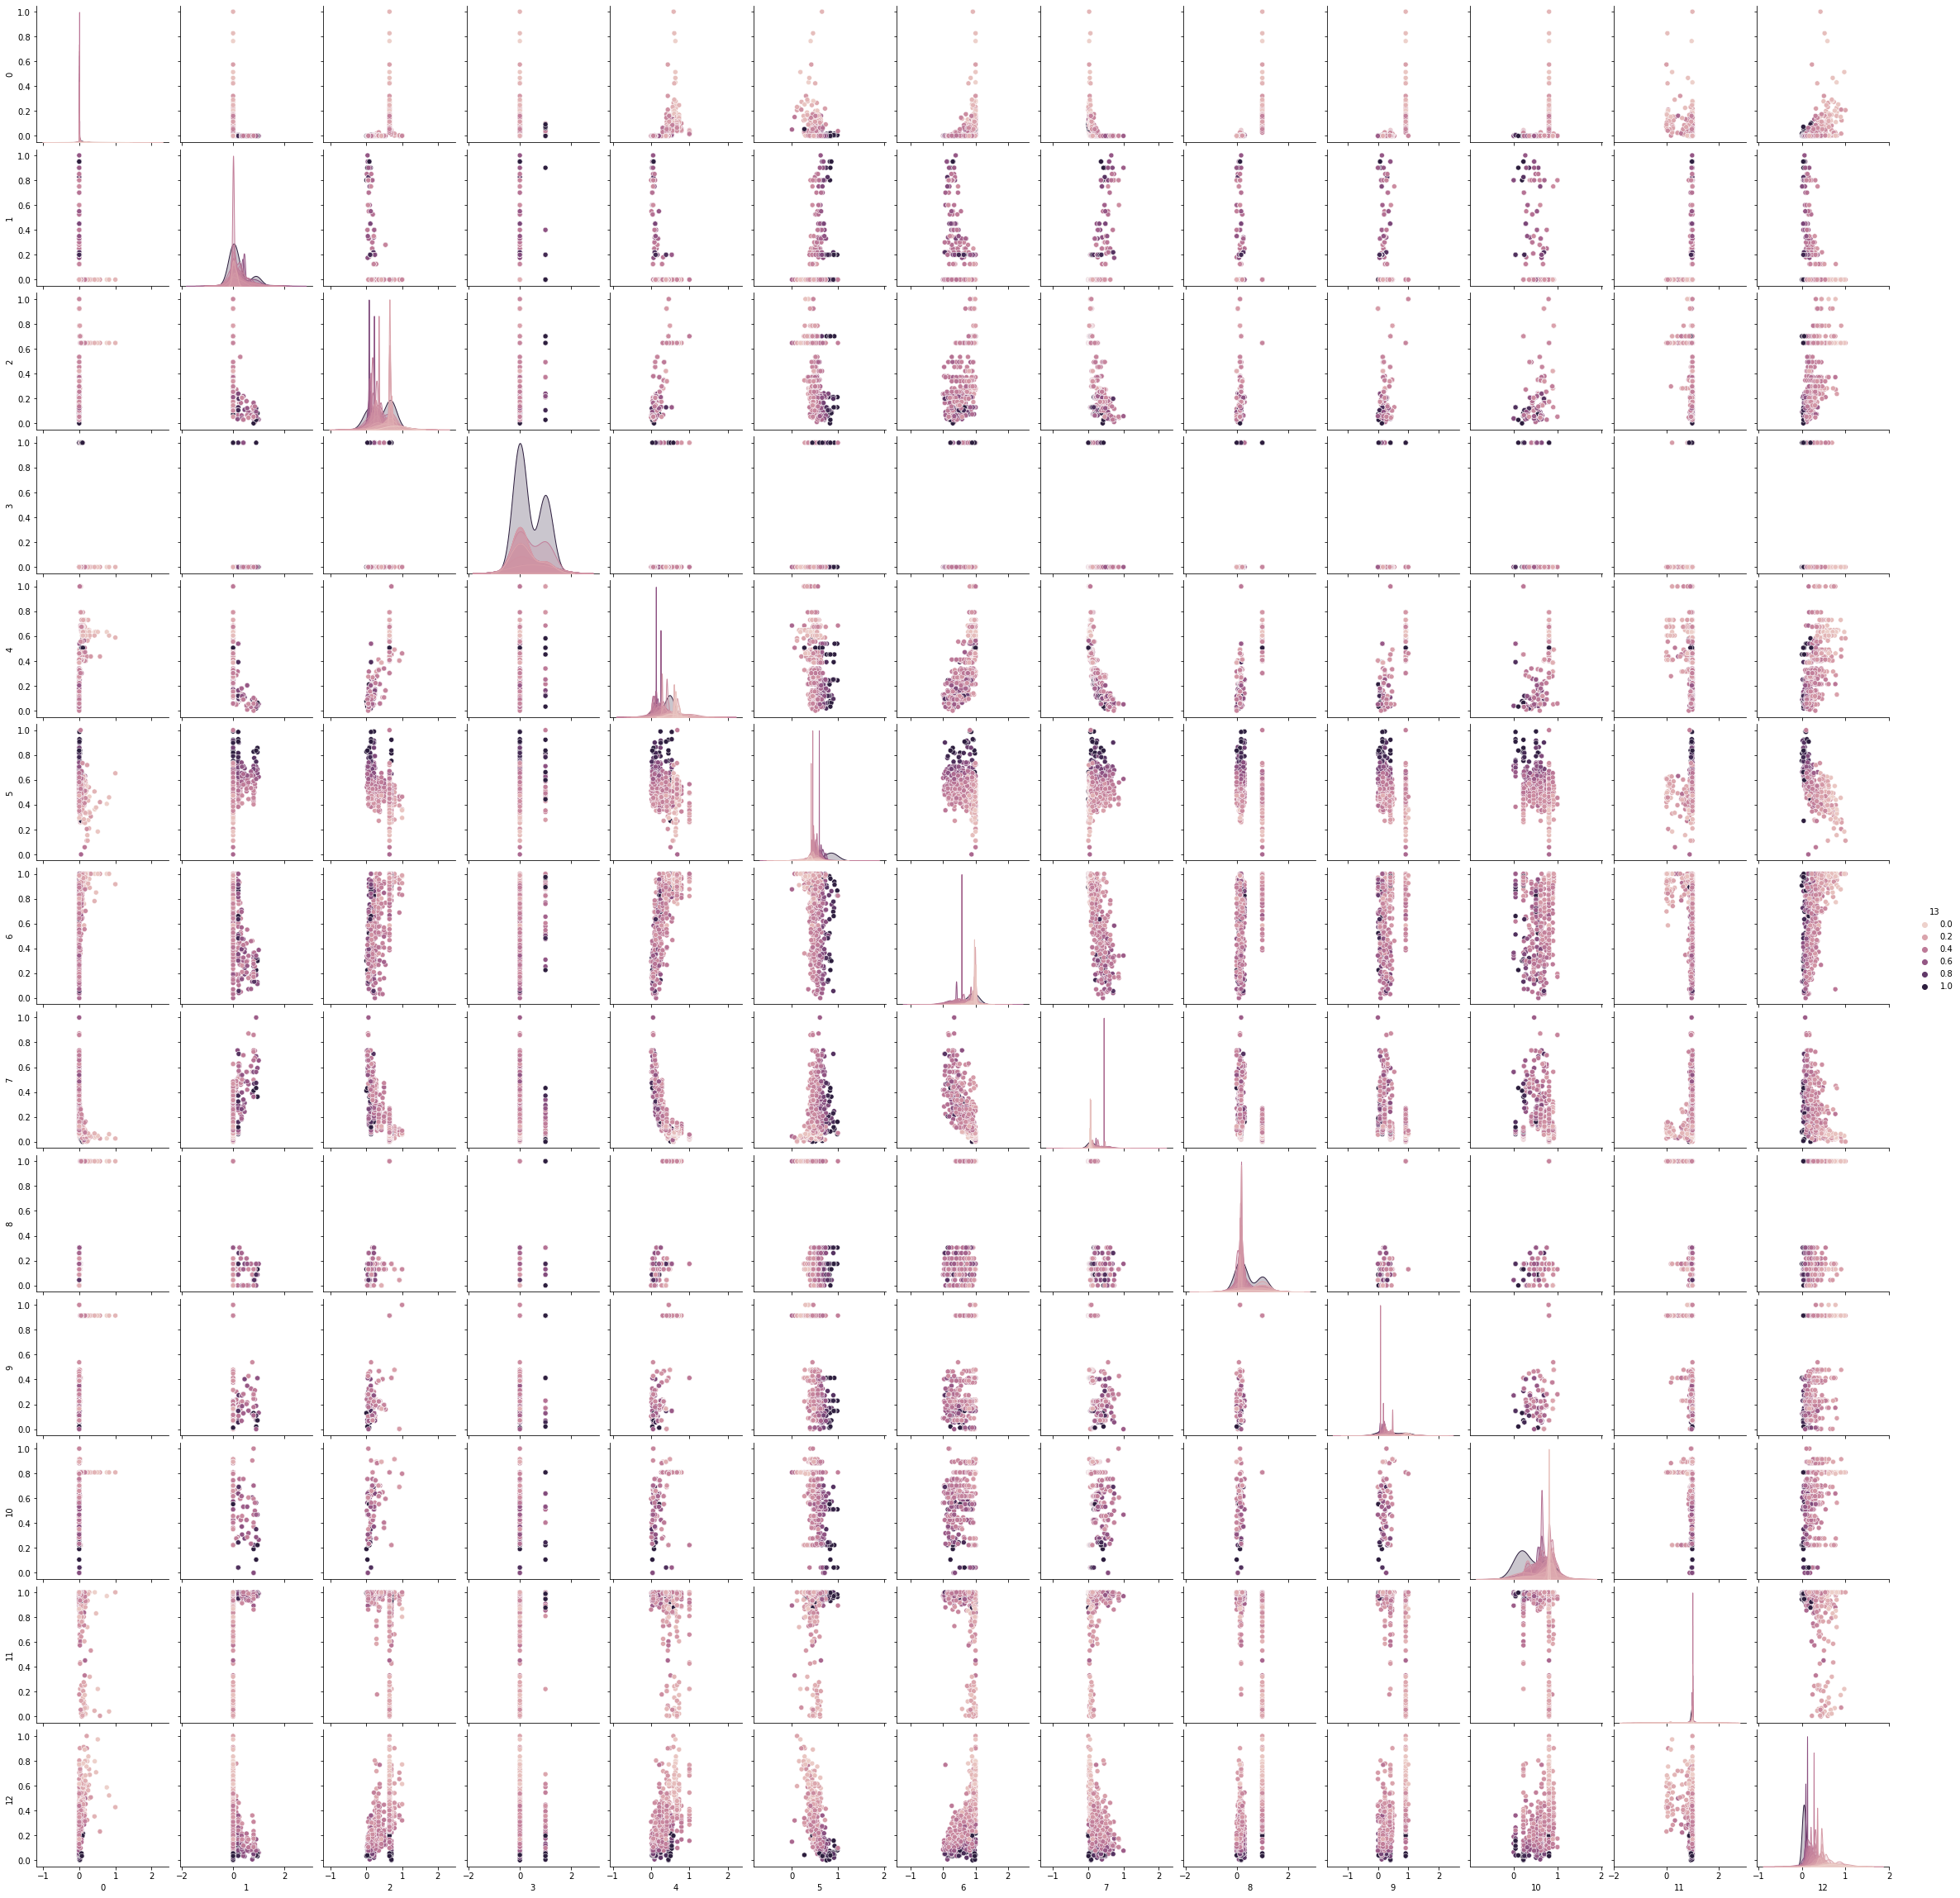

In [149]:
sns.pairplot(dt_house,  hue= dt_house.columns[-1])

In [158]:
dt_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       506 non-null    float64
 1   1       506 non-null    float64
 2   2       506 non-null    float64
 3   3       506 non-null    float64
 4   4       506 non-null    float64
 5   5       506 non-null    float64
 6   6       506 non-null    float64
 7   7       506 non-null    float64
 8   8       506 non-null    float64
 9   9       506 non-null    float64
 10  10      506 non-null    float64
 11  11      506 non-null    float64
 12  12      506 non-null    float64
 13  13      506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [171]:
dt_house.columns = [ str(i) for i in range(len(dt_house.columns)) ]

In [1]:
fig, axs = plt.subplots(figsize=(16,8) , ncols=7 , nrows=2)
lm_features = dt_house.columns[:-1]
for i , feature in enumerate(lm_features):
    row = int(i/7)
    col = i%7
    sns.regplot(x= dt_house.columns[i] , y= dt_house.columns[-1],data=dt_house , ax=axs[row][col])

NameError: name 'plt' is not defined

AttributeError: ignored